## Analysis on models performance 

⚠️ This notebook aims to analyze the results obtained from the experiment conducted in `synthetic_experiments.ipynb`. The analyses include evaluations of the loss functions as well as sensitivity analysis of the communities.


### ⚙️ Environment settings

In [1]:
"""
    Importing needed libs
"""

'\n    Importing needed libs\n'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 🖥️ Data loading

In [3]:
df = pd.read_csv('../outputs/synt_results.csv')
display(df)

,community_detector,used_communities,algorithm_rec,test_size,split_id,rmse,mse,mae
0,Not-Applicable,NaN,NormalPredictor,0.25,1,1.738818,3.023489,1.411847
1,Not-Applicable,NaN,SVD,0.25,1,1.233211,1.520809,1.020247
2,Not-Applicable,NaN,k-NN,0.25,1,1.210751,1.465918,0.997146
3,Not-Applicable,NaN,NMF,0.25,1,1.122119,1.259152,0.917852
4,Not-Applicable,NaN,Co-Clustering,0.25,1,1.211433,1.467571,0.991725
...,...,...,...,...,...,...,...,...
1819,Paris,4.0,Co-Clustering,0.01,5,1.562999,2.442966,1.354936
1820,Paris,1.0,SlopeOne,0.01,5,1.576087,2.484050,1.370542
1821,Paris,2.0,SlopeOne,0.01,5,1.558019,2.427424,1.349797
1822,Paris,3.0,SlopeOne,0.01,5,1.553625,2.413750,1.345638


### 📈 Analysis

#### Sensibility

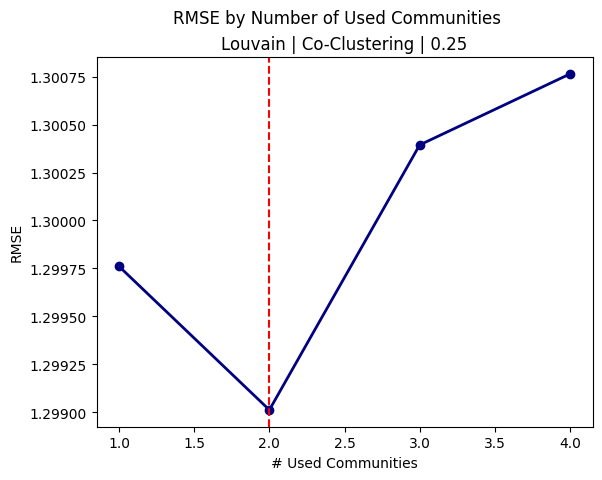

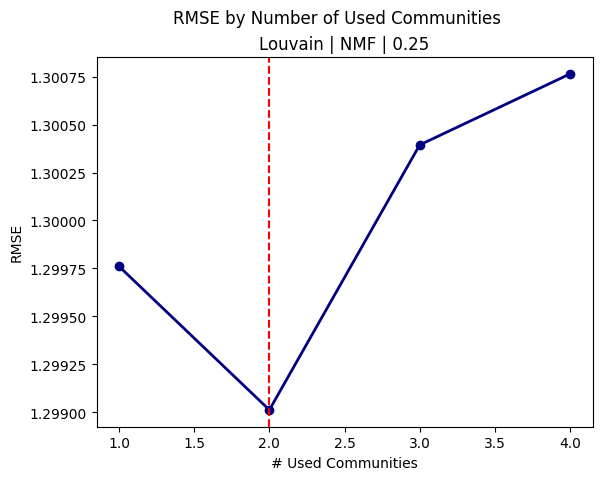

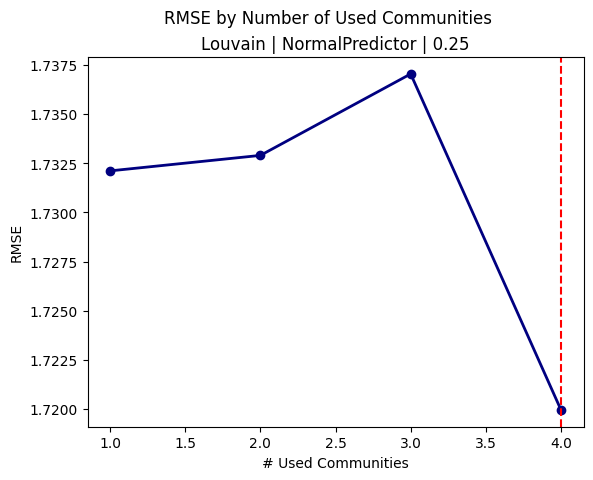

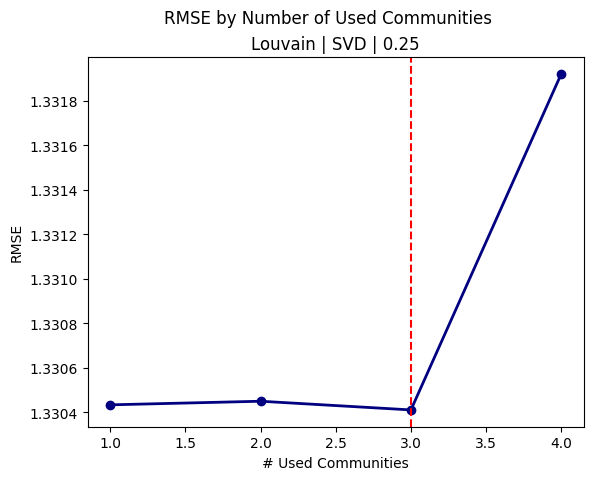

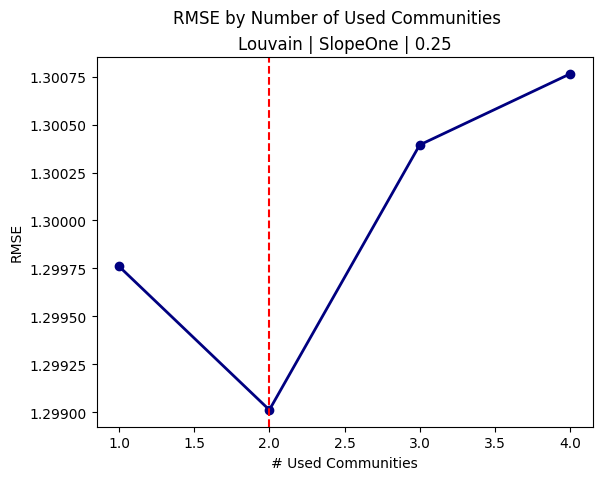

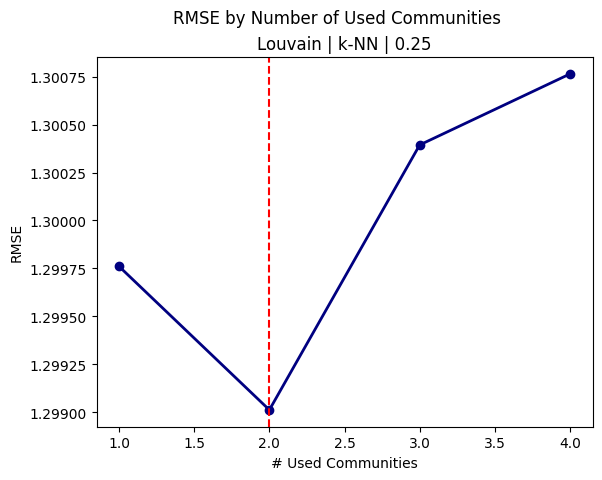

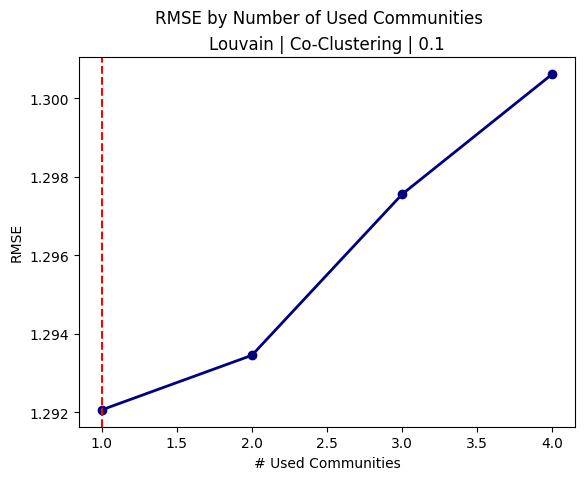

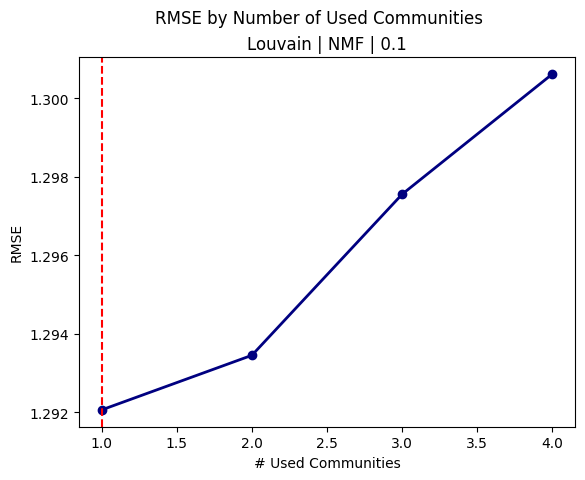

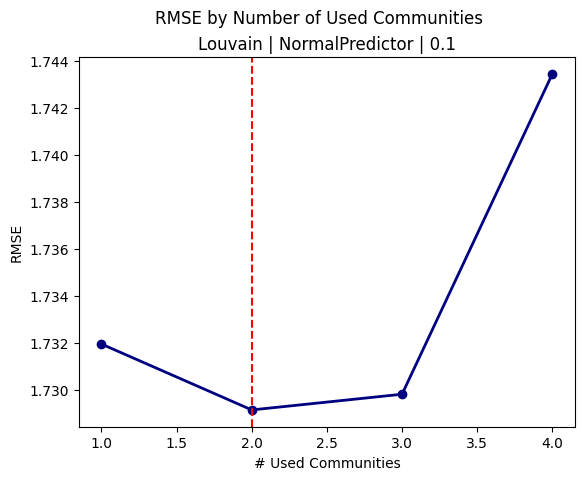

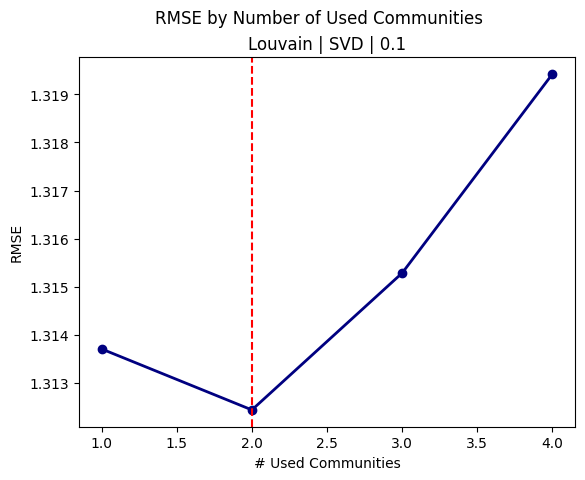

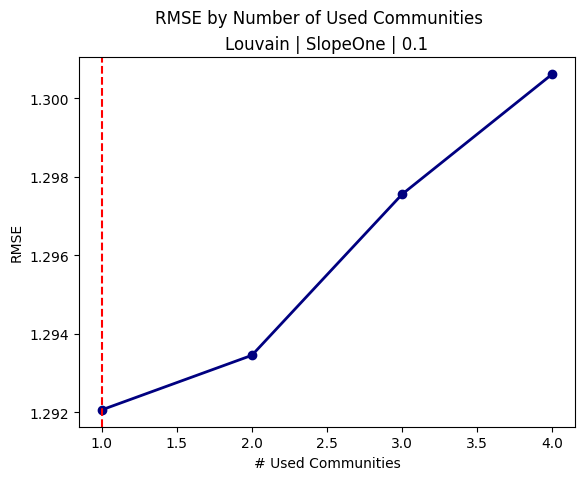

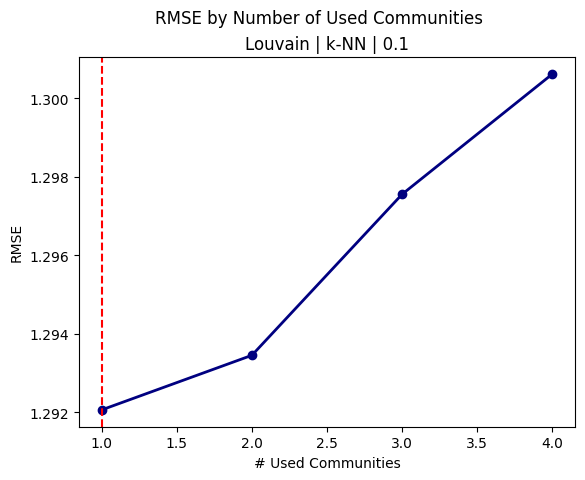

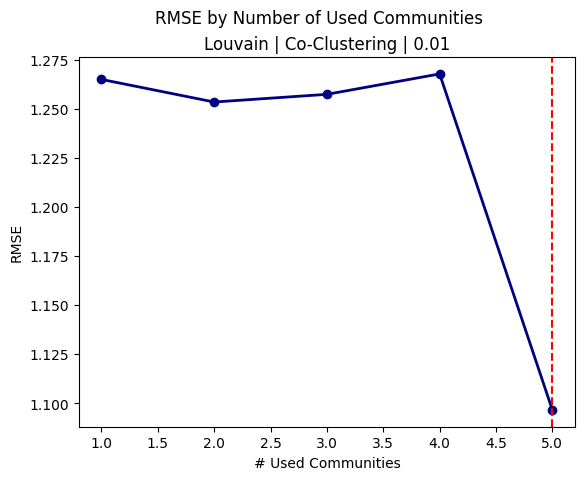

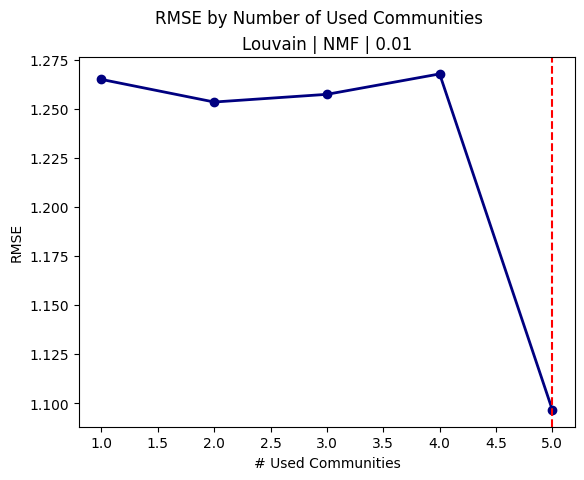

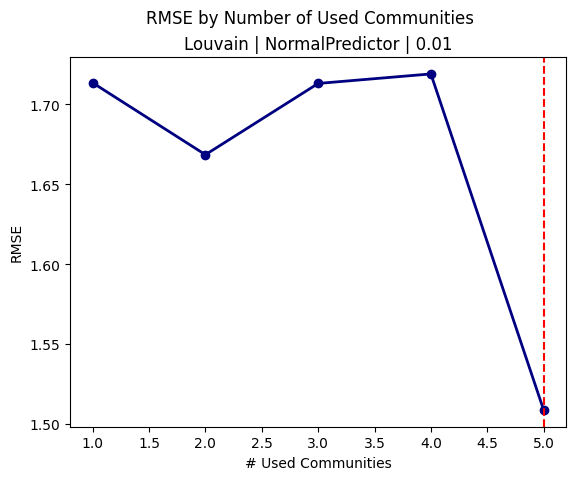

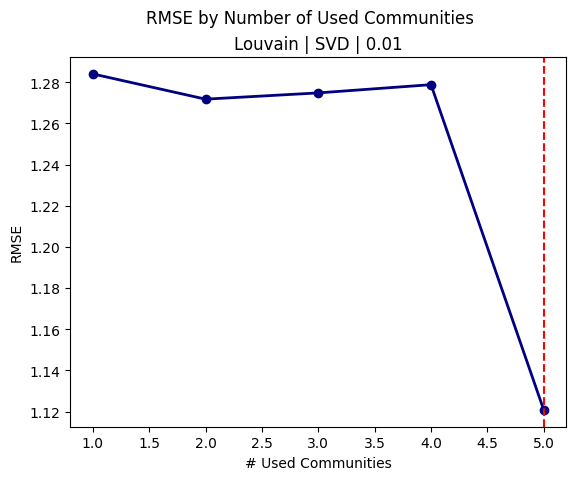

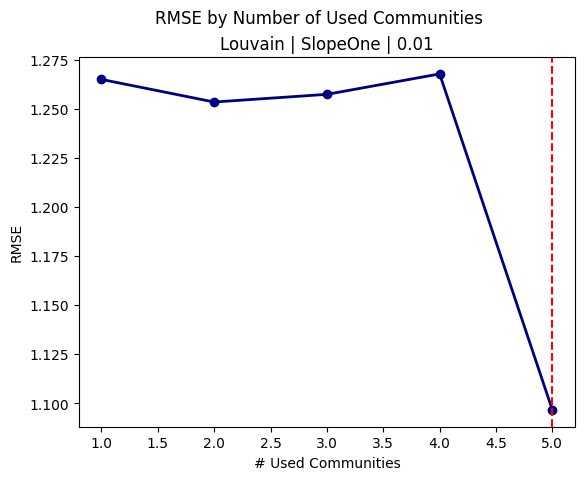

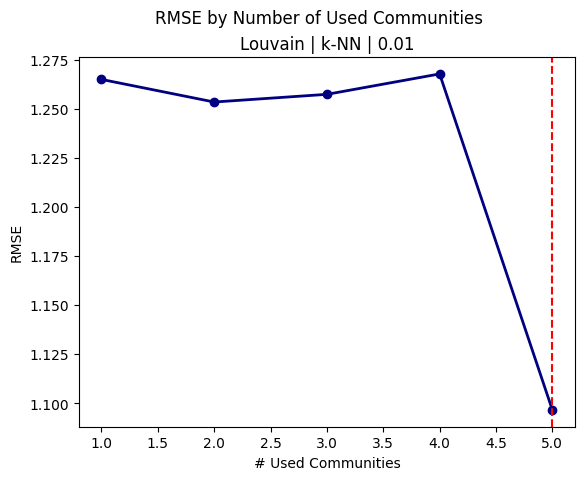

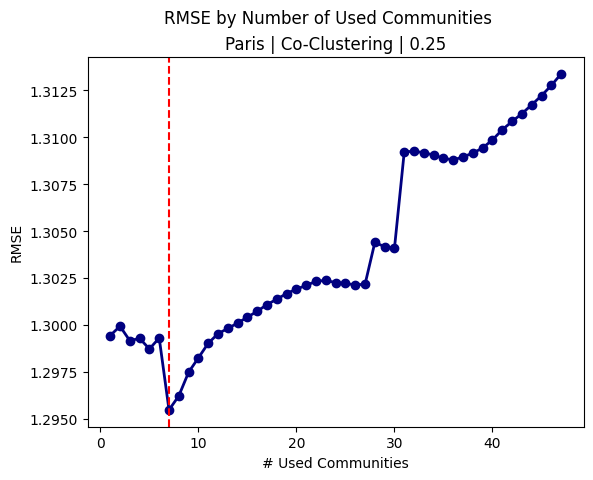

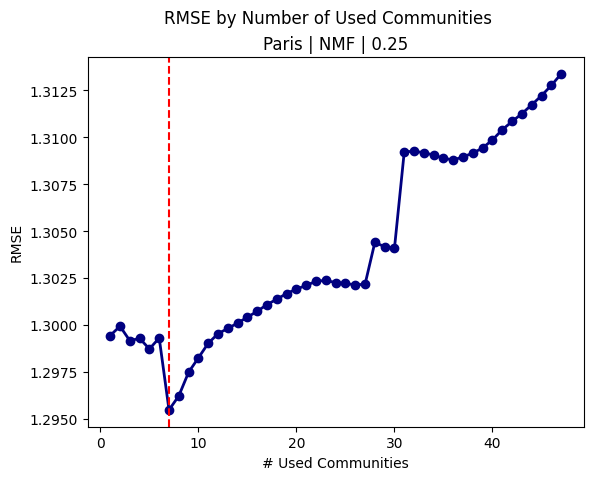

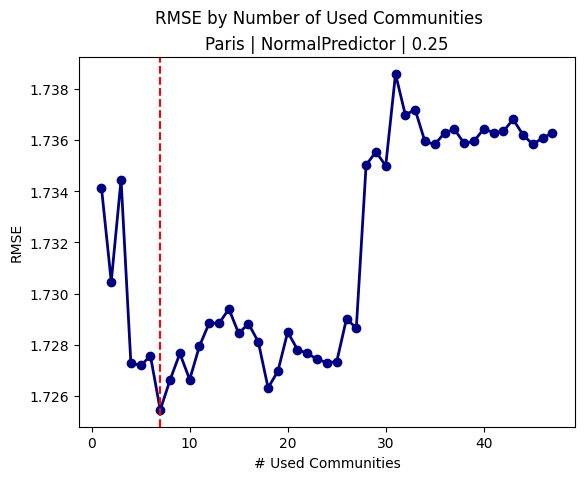

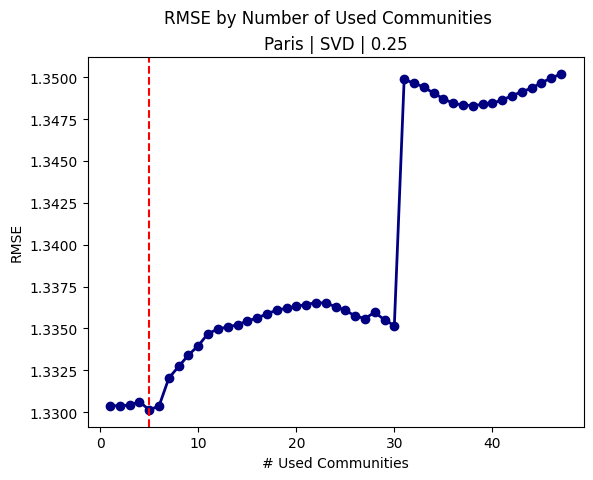

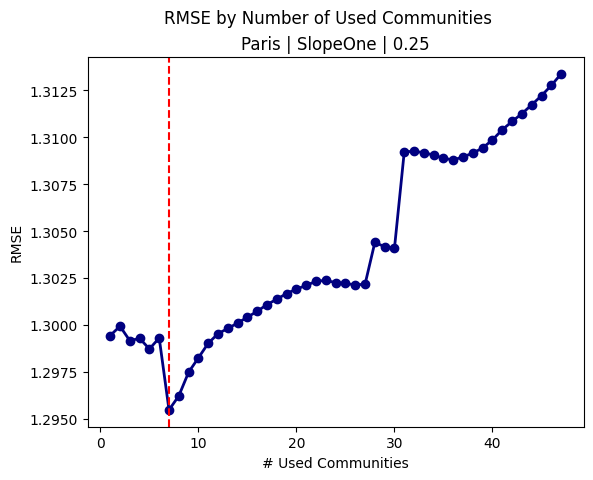

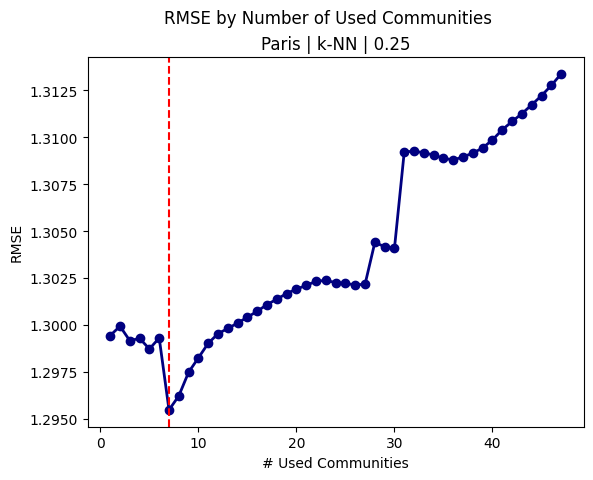

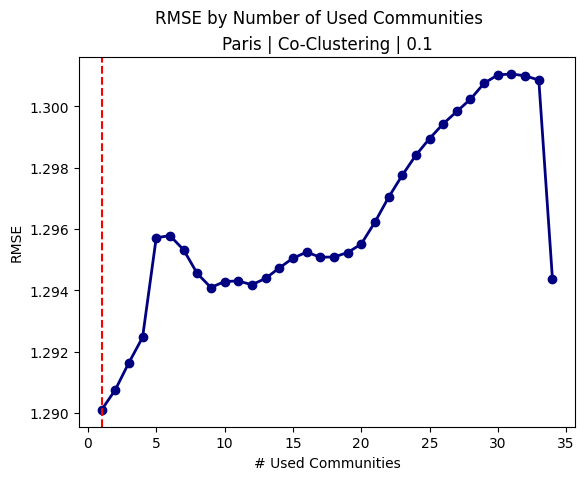

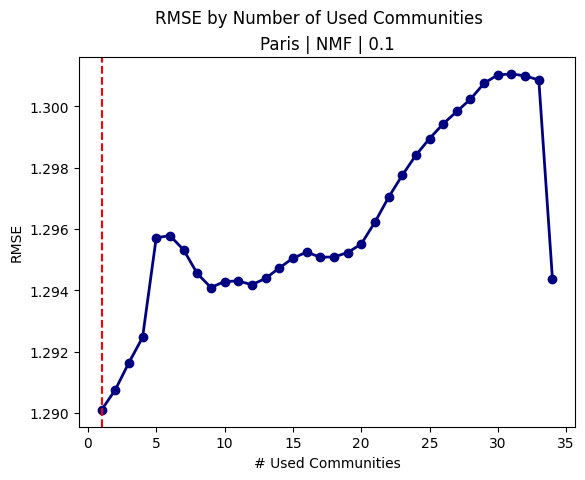

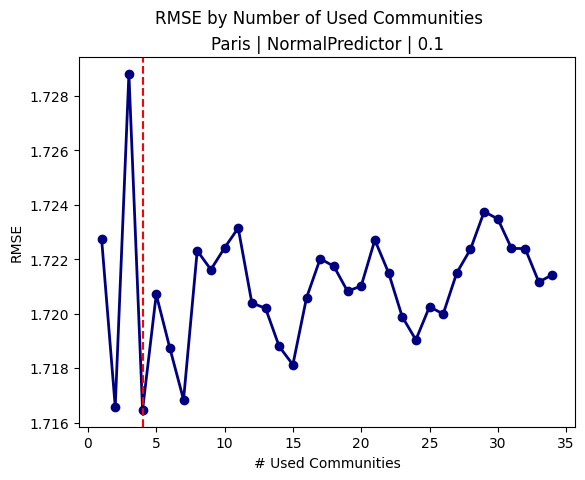

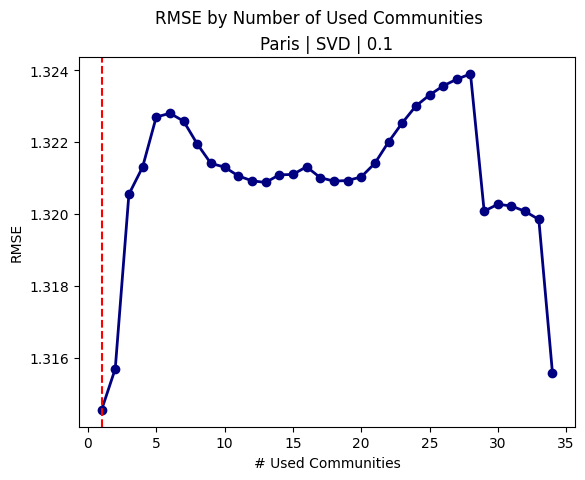

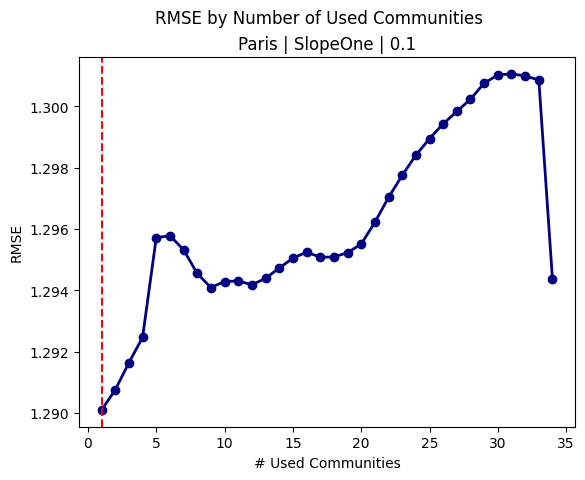

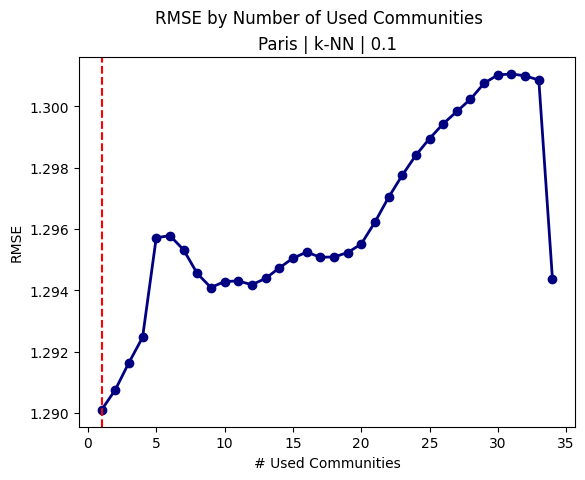

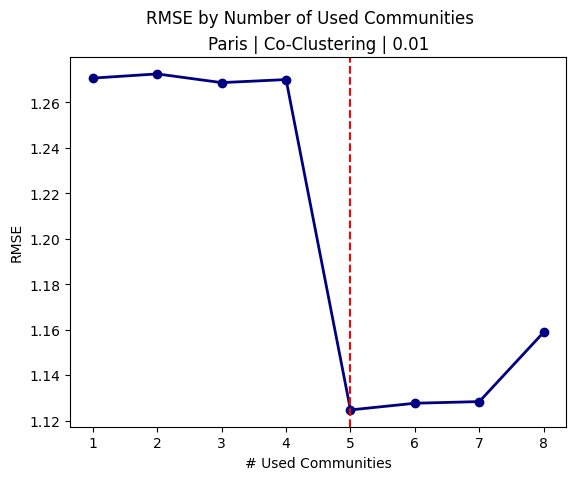

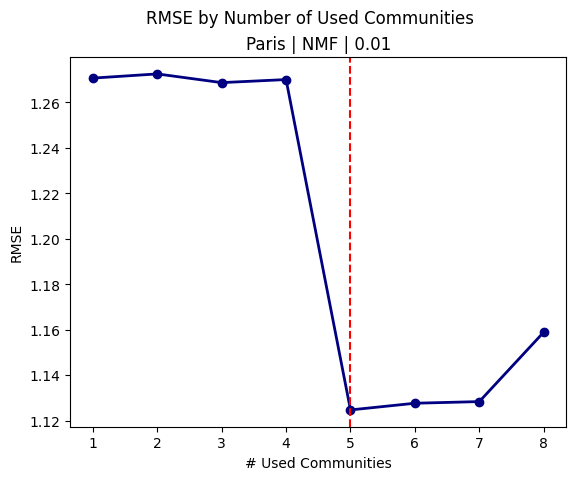

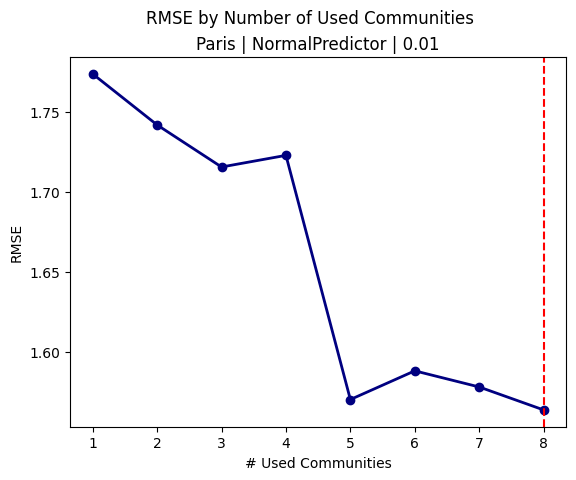

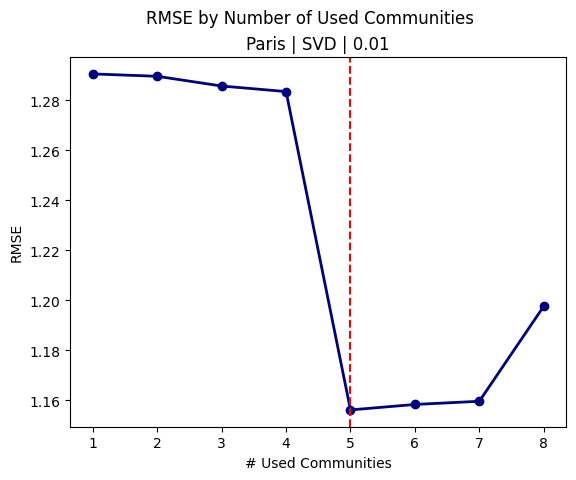

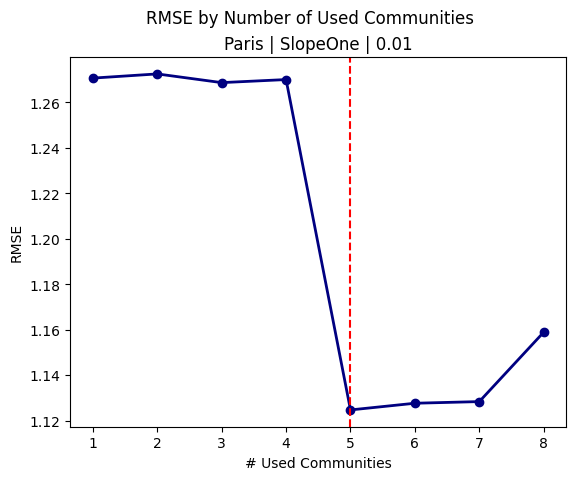

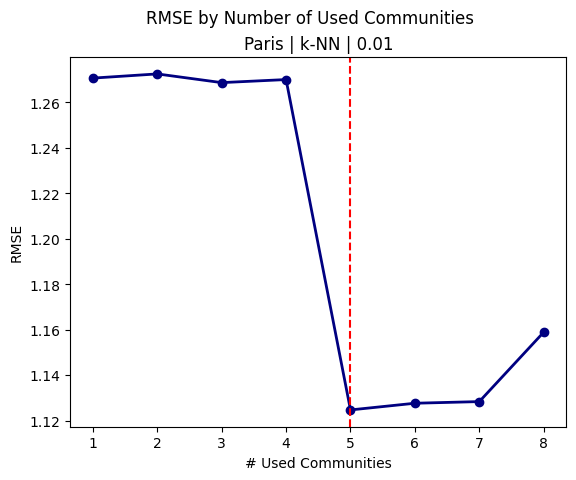

In [4]:
data = df[df['community_detector'] != 'Not-Applicable']
test_sizes = list(
    set(
        data['test_size']
        )
    )
test_sizes.sort(reverse=True) 

community_detectors = list(
    set(
        data['community_detector']
        )
    )
community_detectors.sort()

algos = list(
    set(
        data['algorithm_rec']
        )
    )
algos.sort()

minmap=[]
for community_detector in community_detectors:
    query = data[data['community_detector'] == community_detector]
    for test_size in test_sizes:
        subquery = query[query['test_size'] == test_size]
        rmse = subquery.groupby(['algorithm_rec', 'used_communities'])['rmse'].mean().reset_index()
        for algo in algos:
            output = rmse[rmse['algorithm_rec'] == algo]
            plt.plot(output['used_communities'], output['rmse'], marker='o', color='navy', linewidth=2)
            min_index = output['rmse'].idxmin()
            minimunp = output['used_communities'][min_index]
            minmap.append({
                'detector': community_detector,
                'size': test_size,
                'algorec': algo,
                'best_n': minimunp
            })
            plt.axvline(x=minimunp, color='red', linestyle='--')
            plt.xlabel('# Used Communities')
            plt.ylabel('RMSE')
            plt.suptitle('RMSE by Number of Used Communities')
            plt.title(f'{community_detector} | {algo} | {test_size}')
            community_detector_str = community_detector.lower().replace('-','')
            filename = f'sensibility_for_{community_detector_str}_{algo}_{test_size}'
            plt.savefig(f'../plots/sensibility/{filename}.png')
            plt.show()

In [5]:
df_min = pd.DataFrame(minmap)
display(df_min)

,detector,size,algorec,best_n
0,Louvain,0.25,Co-Clustering,2.0
1,Louvain,0.25,NMF,2.0
2,Louvain,0.25,NormalPredictor,4.0
3,Louvain,0.25,SVD,3.0
4,Louvain,0.25,SlopeOne,2.0
5,Louvain,0.25,k-NN,2.0
6,Louvain,0.10,Co-Clustering,1.0
7,Louvain,0.10,NMF,1.0
8,Louvain,0.10,NormalPredictor,2.0
9,Louvain,0.10,SVD,2.0


In [48]:
df_min.to_csv(f'../outputs/best_n.csv', index=False)

#### Approachs Comparison

In [6]:
test_sizes = list(
    set(
        df['test_size']
        )
    )
test_sizes.sort(reverse=True) 

community_detectors = list(
    set(
        df['community_detector']
        )
    )
community_detectors.sort()

algos = list(
    set(
        df['algorithm_rec']
        )
    )
algos.sort()

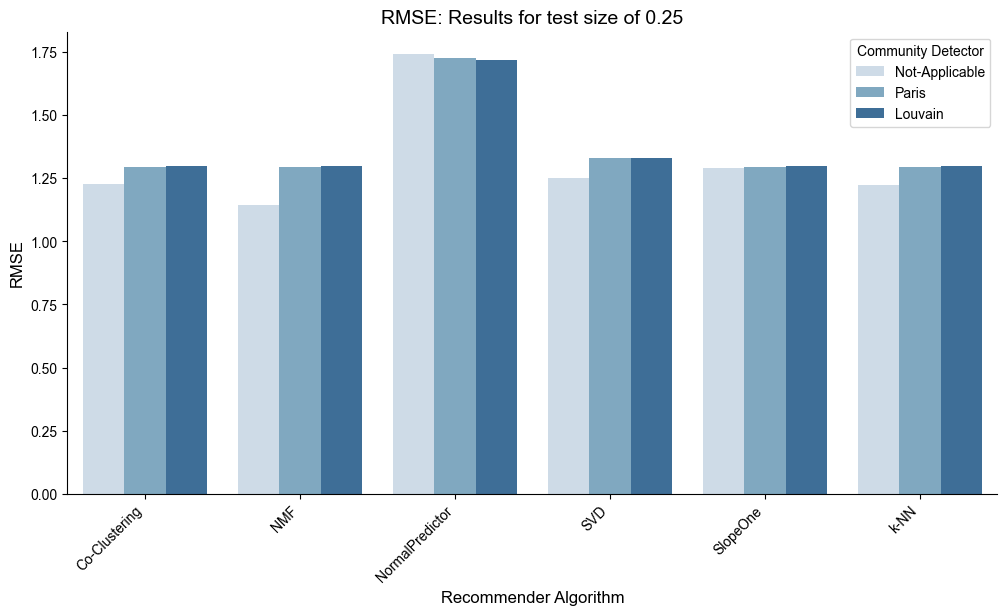

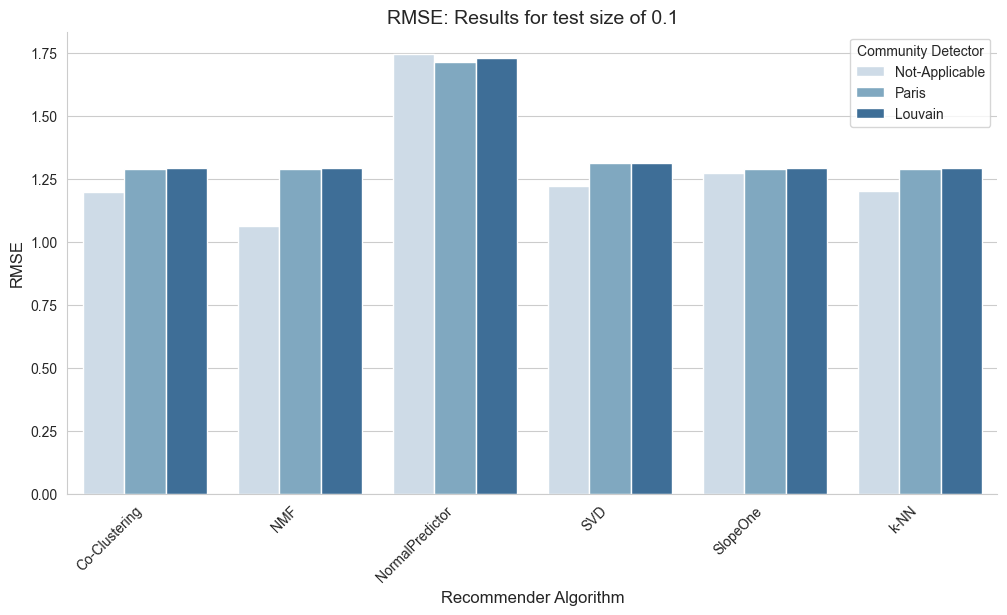

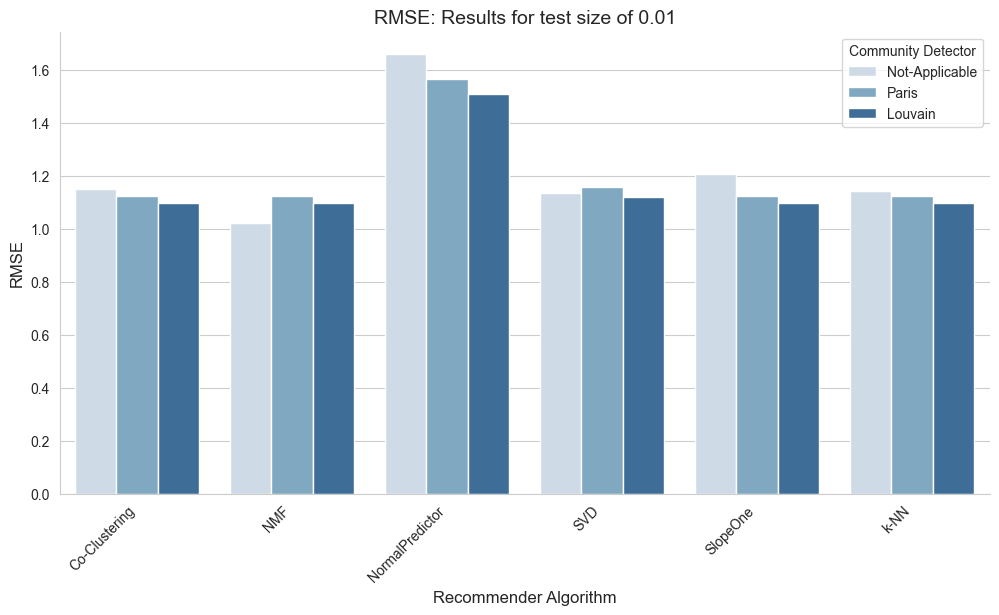

In [46]:
for test_size in test_sizes:
    mapt = df_min[df_min['size'] == test_size][['detector', 'algorec', 'best_n']]
    data = df[df['test_size'] == test_size]
    
    noc = data[data['community_detector'] == 'Not-Applicable']
    noc = noc.groupby(['algorithm_rec', 'community_detector'])['rmse'].mean().reset_index()
    wco = data[data['community_detector'] != 'Not-Applicable']
    wco = wco.groupby(['algorithm_rec', 'community_detector', 'used_communities'])['rmse'].mean().reset_index()
    wco['best_n'] = wco.set_index(['algorithm_rec', 'community_detector']).index.map(mapt.set_index(['algorec', 'detector'])['best_n'])
    wco = wco.drop(wco[wco['used_communities'] != wco['best_n']].index)
    wco.drop(['best_n', 'used_communities'], axis=1, inplace=True)
    
    rmse = pd.concat([noc, wco], ignore_index=True)
    rmse = rmse.sort_values(by='algorithm_rec')
    colors = sns.color_palette('Blues', n_colors=len(rmse['community_detector'].unique()), desat=0.8)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='algorithm_rec', y='rmse', hue='community_detector', data=rmse, palette=colors)
    plt.xlabel('Recommender Algorithm', fontsize=12)
    plt.ylabel('RMSE', fontsize=12)
    plt.title(f'RMSE: Results for test size of {test_size}', fontsize=14)
    plt.legend(title='Community Detector', fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    sns.despine()
    sns.set_style("whitegrid")
    plt.savefig(f'../plots/approachs_comparison/result_{test_size}.png')
    plt.show()
    
    


    
